The content of this notebook aligns with the information presented in [Common Voice: A Massively-Multilingual Speech Corpus](https://arxiv.org/pdf/1912.06670). The analysis focuses on the metadata of the clips from the [**Common Voice Corpus 2**](https://commonvoice.mozilla.org/en/datasets) dataset in Spanish.

In [1]:
# Import standard scientific libraries
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

# Import project-specific libraries
import fireducks.pandas as pd # Custom pandas-like library for data manipulation

sns.set_style("darkgrid")

### Validated Data  

The validation of audio clips is performed by the same users who choose to donate voice recordings. For this reason, Mozilla implemented a simple voting system in which audio clips are validated through **up_votes** and **down_votes** (database features). Each clip can receive a maximum of three votes, and its validity is determined by the number of **up_votes** and **down_votes**. Two (or more) **up_votes** classify the audio as valid, while two (or more) **down_votes** classify it as invalid.

In [2]:
validated = pd.read_csv('Dataset/validated.tsv', delimiter='\t')
validated.head(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,185e6966447d8ff43fb821e98fcc7ba105109bd4c9c46b...,d943b314c0fc393ea34c5c6db3819b600d5d00ea6a2ce7...,Compramos el mejor vino.,2,0,None,None,None


Firstly, we need to consider the structure of this partition. **Each** partition contains eight features, which are described as follows:

- **client_id** $\rightarrow$ This feature represents the anonymized speaker ID.  
- **path** $\rightarrow$ This feature indicates the "name" of the clip.  
- **sentence** $\rightarrow$ The phrase spoken by the speaker.  
- **up_votes** $\rightarrow$ The number of positive votes given by other speakers.  
- **down_votes** $\rightarrow$ The number of negative votes given by other speakers.  
- **age** $\rightarrow$ The age of the speaker at the time of recording the clip.  
- **gender** $\rightarrow$ The gender of the speaker.  
- **accent** $\rightarrow$ The accent of the speaker.  

In this case, the `validated` partition contains **23,405** rows, each describing an individual recorded clip.

In [3]:
#27128
validated.shape

(23405, 8)

It is possible to observe that, in our sample population, most voice donations come from adults. The teenage and sixties age ranges have contributed fewer voice clips. However, individuals in their twenties represent the group with the highest voice donations, followed by those in their thirties, forties, and fifties, who also show notable participation.  

Additionally, the male gender has contributed more voice clips, while the "other" category represents a minority.

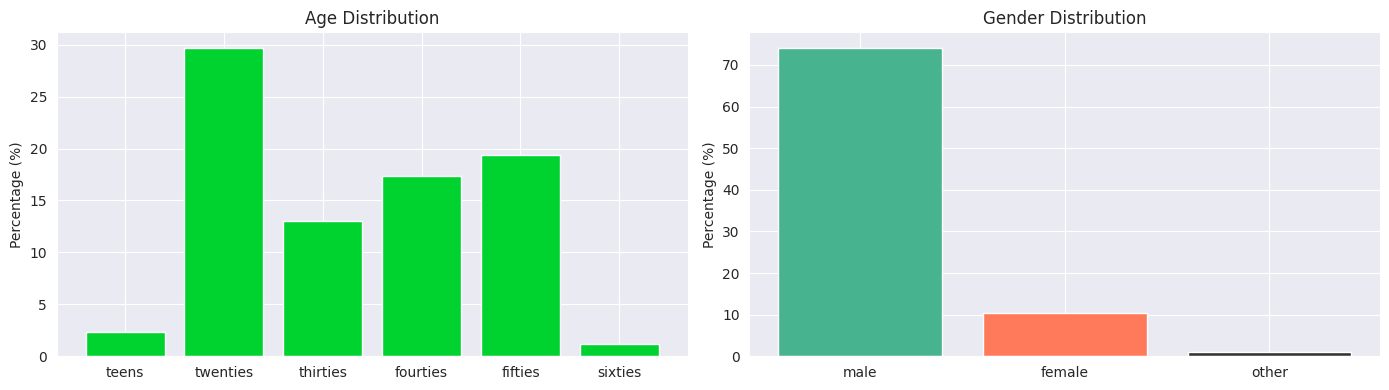

In [4]:
# Order of age groups
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))

# Plot age distribution in percentage
age_counts = validated['age'].value_counts(normalize=True).reindex(age_order)
ax1.bar(age_order, age_counts * 100, color='#00D230')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Age Distribution')

# Plot gender distribution in percentage
gender_counts = validated['gender'].value_counts(normalize=True)
ax2.bar(gender_counts.index, gender_counts * 100, color=['#47B38F','#FF7A5A','#333333'])
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Gender Distribution')

plt.tight_layout()
plt.show()

We can confirm that males are the majority of contributors sending voice clips, regardless of gender. However, this gender imbalance, caused by lower participation from women, could pose a challenge for the dataset's implementation in the future.

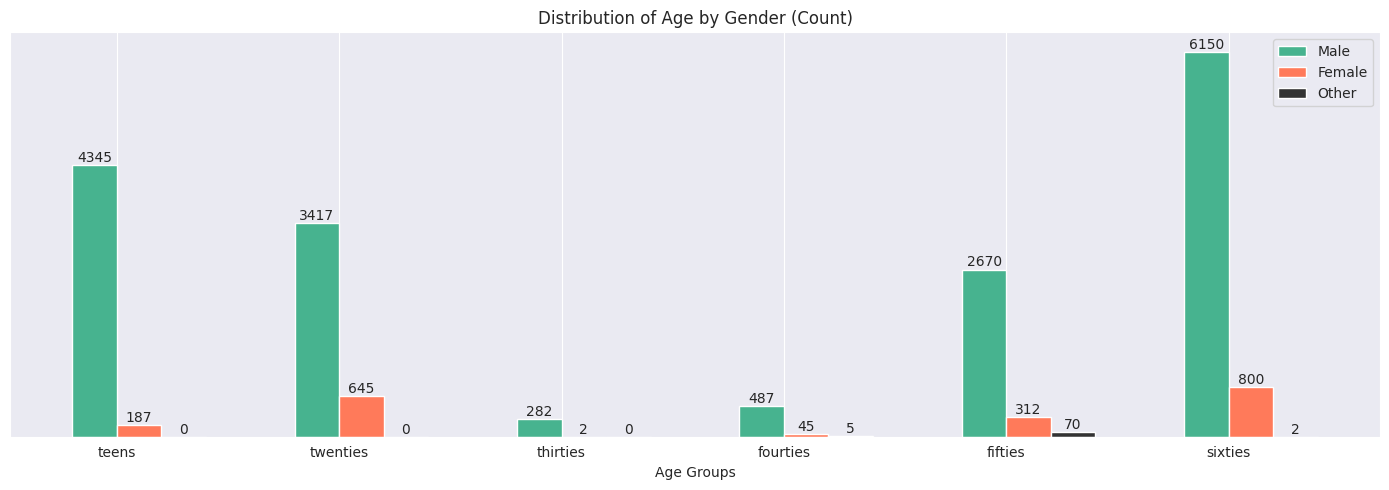

In [5]:
# Filter the dataset for relevant variables
gender_age_data = validated[validated['gender'].isin(['male', 'female', 'other'])]

# Calculate counts for each gender and age group
gender_counts = gender_age_data.groupby(['gender', 'age'])['age'].count().unstack().T.fillna(0)

# Create the figure and axes (2 rows, 1 column)
fig, ax1 = plt.subplots(figsize=(14, 5))  # Only one subplot now

# Bar width and x_positions
bar_width = 0.2
x_positions = range(len(age_order))

# Plot counts on the first axis (ax1)
for i, gender in enumerate(['male', 'female', 'other']):
    if gender == 'male': color = '#47B38F'
    elif gender == 'female': color ='#FF7A5A'
    else: color ='#333333'
    
    bars = ax1.bar(
        [x + (i - 0.5) * bar_width for x in x_positions],
        gender_counts[gender],
        width=bar_width,
        color=color,
        label=gender.capitalize()
    )

    # Add count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2, yval + 1,  # Positioning the label above the bar
            f'{int(yval)}',  # Format the label as a count
            ha='center', va='bottom', fontsize=10  # Horizontal and vertical alignment
        )

# Set x-ticks and labels
ax1.set_xticks(x_positions)
ax1.set_xticklabels(age_order)
ax1.set_xlabel('Age Groups')  # Only x-label remains

# Set title
ax1.set_title('Distribution of Age by Gender (Count)')

# Disable Y axis
ax1.get_yaxis().set_visible(False)

# Add legend
ax1.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()

It is evident that approximately **30%** of Spanish speakers in the dataset belong to the **Northern Peninsular** region. Similarly, there is an approximate proportion of **12%** from the Andean region, which could reflect a generalization of various accents, such as Tolimense, Antioqueño, Boyacense, among others. The remaining regions individually represent less than **10%** each.  

**Note:** I am not an expert in geography, but I assume that in all regions, a variety of accents among speakers is implicitly present.

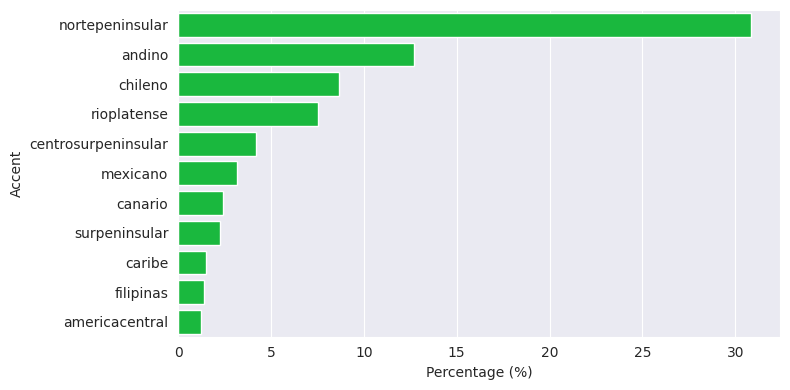

In [6]:
# Calcular porcentajes y ordenar en orden descendente
accent_counts = validated['accent'].value_counts(normalize=True).reset_index()
accent_counts.columns = ['accent', 'percentage']
accent_counts['percentage'] *= 100  # Convertir a porcentaje

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))  # Ajustar ancho y altura

sns.barplot(
    y='accent',
    x='percentage',
    data=accent_counts,
    color='#00D230'
)

# Agregar etiquetas
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Accent')
plt.tight_layout()
plt.show()

Despite having high proportions of missing values, they are not considered problematic. In the case of the `age` variable, I am uncertain whether an increase in age effectively generalizes voice synthesis. Regarding the `gender` variable, it is evident that in **84%** of the available data, the majority of speakers are male. Therefore, it is essential to verify the distributions in the ***train*** and ***test*** datasets.  

Similarly, the `accent` variable shows that in **76%** of the available data, more than **30%** of the speakers belong to the **Northern Peninsular** region. The other regions do not individually hold significant proportions. However, this higher proportion might introduce challenges in the generalization of voice synthesis concerning accent variation.

In [7]:
validated.isnull().sum() / validated.shape[0] * 100

client_id      0.000000
path           0.000000
sentence       0.000000
up_votes       0.000000
down_votes     0.000000
age           16.996368
gender        14.492630
accent        24.071780
dtype: float64

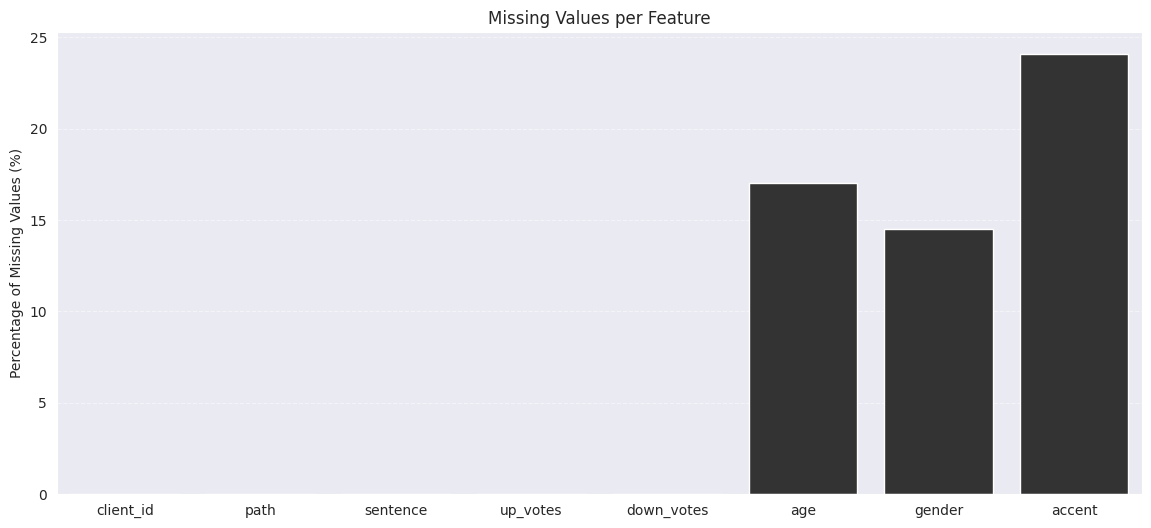

In [8]:
# Calculate missing values
missing_values = validated.isnull().sum()
missing_values /= validated.shape[0]
missing_values *= 100

# Plot settings
plt.figure(figsize=(14, 6))
sns.barplot(
    x=missing_values.index,
    y=missing_values.values,
    color='#333333'
)

# Customize plot
plt.ylabel('Percentage of Missing Values (%)')
plt.xlabel('')
plt.title('Missing Values per Feature')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Train adn Test data

Now, we will explore how the `train` and `test` partitions are constituted. It is important to remember that these partitions are derived from the previously validated clips, not from the entire dataset. This distinction ensures that the training and testing processes are based on high-quality, pre-validated data, minimizing potential biases and inconsistencies.

In [9]:
train = pd.read_csv('Dataset/train.tsv', delimiter='\t')
test = pd.read_csv('Dataset/test.tsv', delimiter='\t')

print(f'Train dataset rows ({train.shape[0]})')
print(f'Test dataset rows ({test.shape[0]})')

Train dataset rows (3275)
Test dataset rows (2727)


We can observe that the `test` partition contains more null values than the `train` partition, and the magnitude of these null values is significantly higher. Specifically, the `test` partition has at least $50\%$ missing data in these variables. If these features are used in a model aimed at generalizing Hispanic speakers, this high percentage of missing values could introduce significant issues, potentially affecting the model's performance and reliability.

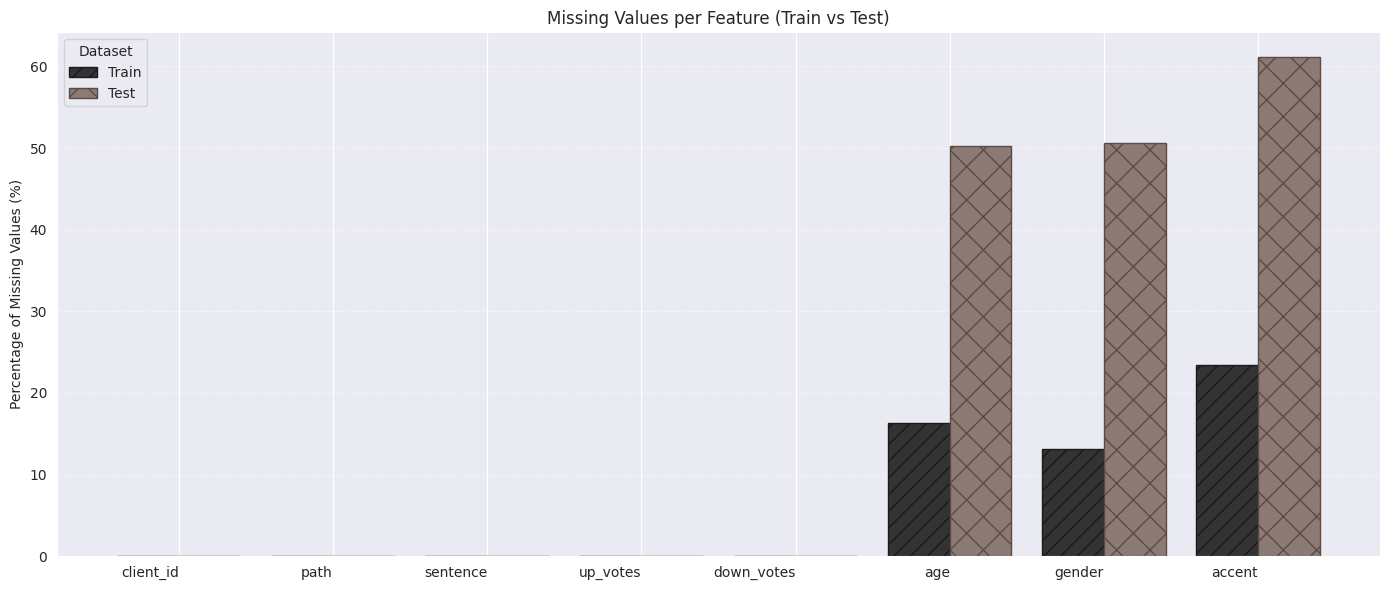

In [20]:
# Calculate missing values
train_missing_values = train.isnull().sum() / train.shape[0] * 100
test_missing_values = test.isnull().sum() / test.shape[0] * 100

missing_values = pd.DataFrame({
    'Feature': train_missing_values.index,
    'Train': train_missing_values.values,
    'Test': test_missing_values.values
})

# Plot settings
x = np.arange(len(missing_values['Feature']))  # X-axis positions
width = 0.4  # Width of each bar

fig, ax = plt.subplots(figsize=(14, 6))

# Plot Train bars with hatching
bars_train = ax.bar(
    x - width/2,
    missing_values['Train'],
    width=width,
    color='#333333',
    edgecolor='#1A1A1A',
    hatch='//',
    label='Train'
)

# Plot Test bars
bars_test = ax.bar(
    x + width/2,
    missing_values['Test'],
    width=width,
    color='#8C7B75',
    edgecolor='#5C4A45',
    hatch='x',
    label='Test'
)

# Customize plot
ax.set_ylabel('Percentage of Missing Values (%)')
ax.set_xlabel('')
ax.set_title('Missing Values per Feature (Train vs Test)')
ax.set_xticks(x)  # Set the tick positions
ax.set_xticklabels(missing_values['Feature'], ha='right')
ax.legend(title='Dataset')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Display plot
plt.tight_layout()
plt.show()

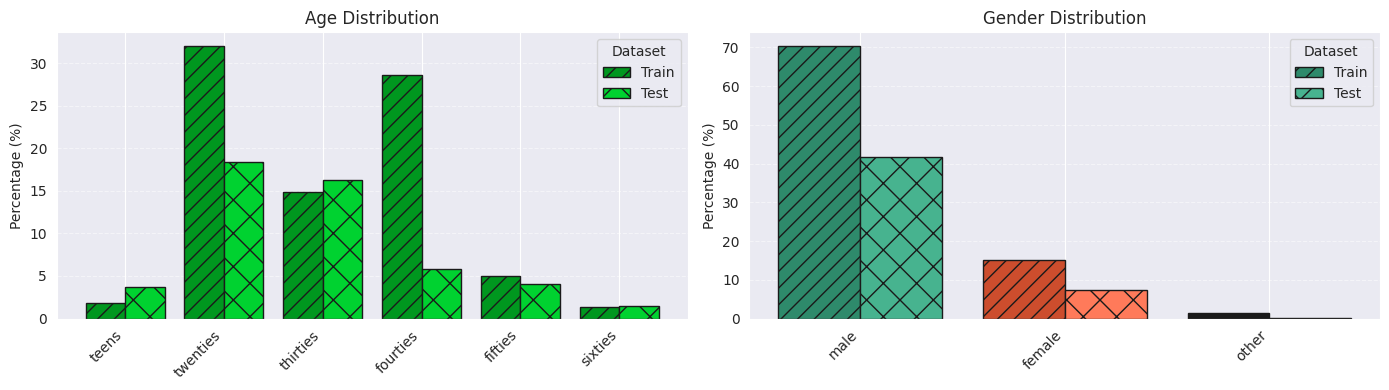

In [23]:
# Order of age groups
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))

# --- Age Distribution Comparison ---
age_counts_train = train['age'].value_counts(normalize=True).reindex(age_order)
age_counts_test = test['age'].value_counts(normalize=True).reindex(age_order)

x_age = range(len(age_order))
width = 0.4

# Train bars (Darker Green)
ax1.bar(
    [i - width/2 for i in x_age],
    age_counts_train * 100,
    width=width,
    color='#00971F',  # Darker Green for Train
    edgecolor='#1A1A1A',
    hatch='//',
    label='Train'
)

# Test bars (Lighter Green)
ax1.bar(
    [i + width/2 for i in x_age],
    age_counts_test * 100,
    width=width,
    color='#00D230',  # Lighter Green for Test
    edgecolor='#1A1A1A',
    hatch='x',
    label='Test'
)

ax1.set_ylabel('Percentage (%)')
ax1.set_title('Age Distribution')
ax1.set_xticks(x_age)
ax1.set_xticklabels(age_order, rotation=45, ha='right')
ax1.legend(title='Dataset')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Gender Distribution Comparison ---
gender_order = ['male', 'female', 'other']
gender_counts_train = train['gender'].value_counts(normalize=True).reindex(gender_order)
gender_counts_test = test['gender'].value_counts(normalize=True).reindex(gender_order)

x_gender = range(len(gender_order))

# Train bars (Darker Colors)
ax2.bar(
    [i - width/2 for i in x_gender],
    gender_counts_train * 100,
    width=width,
    color=['#2E8A6B', '#CC4D2D', '#1A1A1A'],  # Darker shades for Train
    edgecolor='#1A1A1A',
    hatch='//',
    label='Train'
)

# Test bars (Lighter Colors)
ax2.bar(
    [i + width/2 for i in x_gender],
    gender_counts_test * 100,
    width=width,
    color=['#47B38F', '#FF7A5A', '#333333'],  # Lighter shades for Test
    edgecolor='#1A1A1A',
    hatch='x',
    label='Test'
)

ax2.set_ylabel('Percentage (%)')
ax2.set_title('Gender Distribution')
ax2.set_xticks(x_gender)
ax2.set_xticklabels(gender_order, rotation=45, ha='right')
ax2.legend(title='Dataset')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

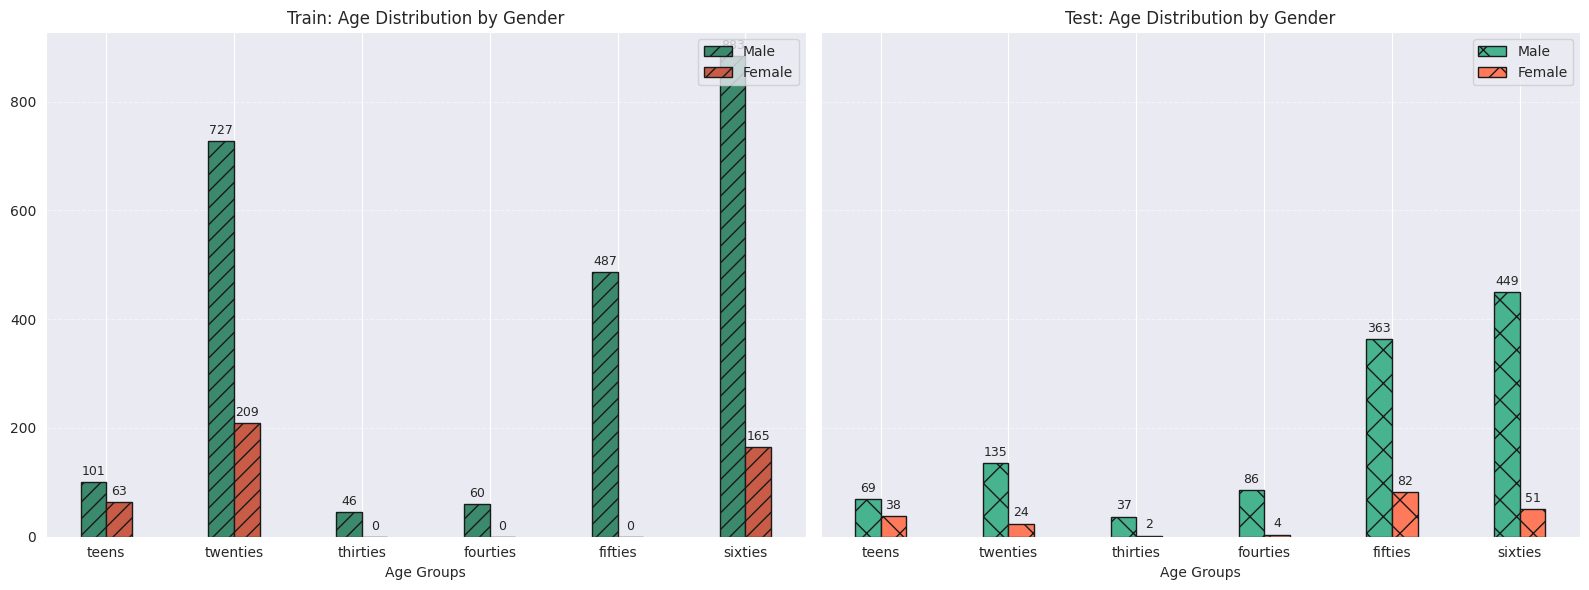

In [42]:
# Filter datasets for relevant variables
gender_age_data_train = train[train['gender'].isin(['male', 'female'])]
gender_age_data_test = test[test['gender'].isin(['male', 'female'])]

# Calculate counts for each gender and age group
gender_counts_train = gender_age_data_train.groupby(['gender', 'age'])['age'].count().unstack().T.fillna(0)
gender_counts_test = gender_age_data_test.groupby(['gender', 'age'])['age'].count().unstack().T.fillna(0)

# Create the figure and axes (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

# Bar width and x_positions
bar_width = 0.2
x_positions = range(len(age_order))

# Plot Train data
for i, gender in enumerate(['male', 'female']):
    color = '#3B8A6E' if gender == 'male' else '#C85C47'  # Darker tones for Train

    bars = ax1.bar(
        [x + (i - 0.5) * bar_width for x in x_positions],
        gender_counts_train[gender],
        width=bar_width,
        color=color,
        edgecolor='#1A1A1A',
        hatch='//',
        label=gender.capitalize()
    )

# Add bar labels using bar_label
for container in ax1.containers:
    ax1.bar_label(container, fontsize=9, fmt='%d', label_type='edge', padding=3)

ax1.set_xticks(x_positions)
ax1.set_xticklabels(age_order)
ax1.set_title('Train: Age Distribution by Gender')
ax1.set_xlabel('Age Groups')
ax1.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Plot Test data
for i, gender in enumerate(['male', 'female']):
    color = '#47B38F' if gender == 'male' else '#FF7A5A'  # Lighter tones for Test

    bars = ax2.bar(
        [x + (i - 0.5) * bar_width for x in x_positions],
        gender_counts_test[gender],
        width=bar_width,
        color=color,
        edgecolor='#1A1A1A',
        hatch='x',
        label=gender.capitalize()
    )

# Add bar labels using bar_label
for container in ax2.containers:
    ax2.bar_label(container, fontsize=9, fmt='%d', label_type='edge', padding=3)

ax2.set_xticks(x_positions)
ax2.set_xticklabels(age_order)
ax2.set_title('Test: Age Distribution by Gender')
ax2.set_xlabel('Age Groups')
ax2.legend(loc='upper right')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

In the **accent** feature, we can observe its behavior and draw inferences from it:

- **First**, both partitions do not share the exact same regions. For example, the `train` partition includes the **filipinas** region, while the `test` partition does not have it. This absence highlights a lack of regional overlap between the two datasets.

- **Second**, the regional proportions differ significantly between the partitions. In the `train` partition, the **nortepeninsular** region stands out as the most common speaker origin, representing approximately ~$21\%$ of the data. In contrast, in the `test` partition, the most common speaker origin is the **mexicano** region, accounting for only ~$7\%$ of the data.

These differences—both in the regions represented in each partition and in their respective proportions—could introduce challenges when training and generalizing a speaker pattern model. The imbalance and lack of regional overlap may result in biased predictions, as the model might not adequately learn the accent patterns from underrepresented regions or could overfit to the predominant ones in each partition.

**Note:** Remember that this dataset was published in **2019**, marking it as the first dataset in Spanish offered by **Mozilla Common Voice**. As a result, its regional statistics may be less representative and more imbalanced compared to newer versions of the dataset. Subsequent releases have likely addressed these limitations, offering improved regional coverage and more balanced distributions across different accents and speaker demographics.

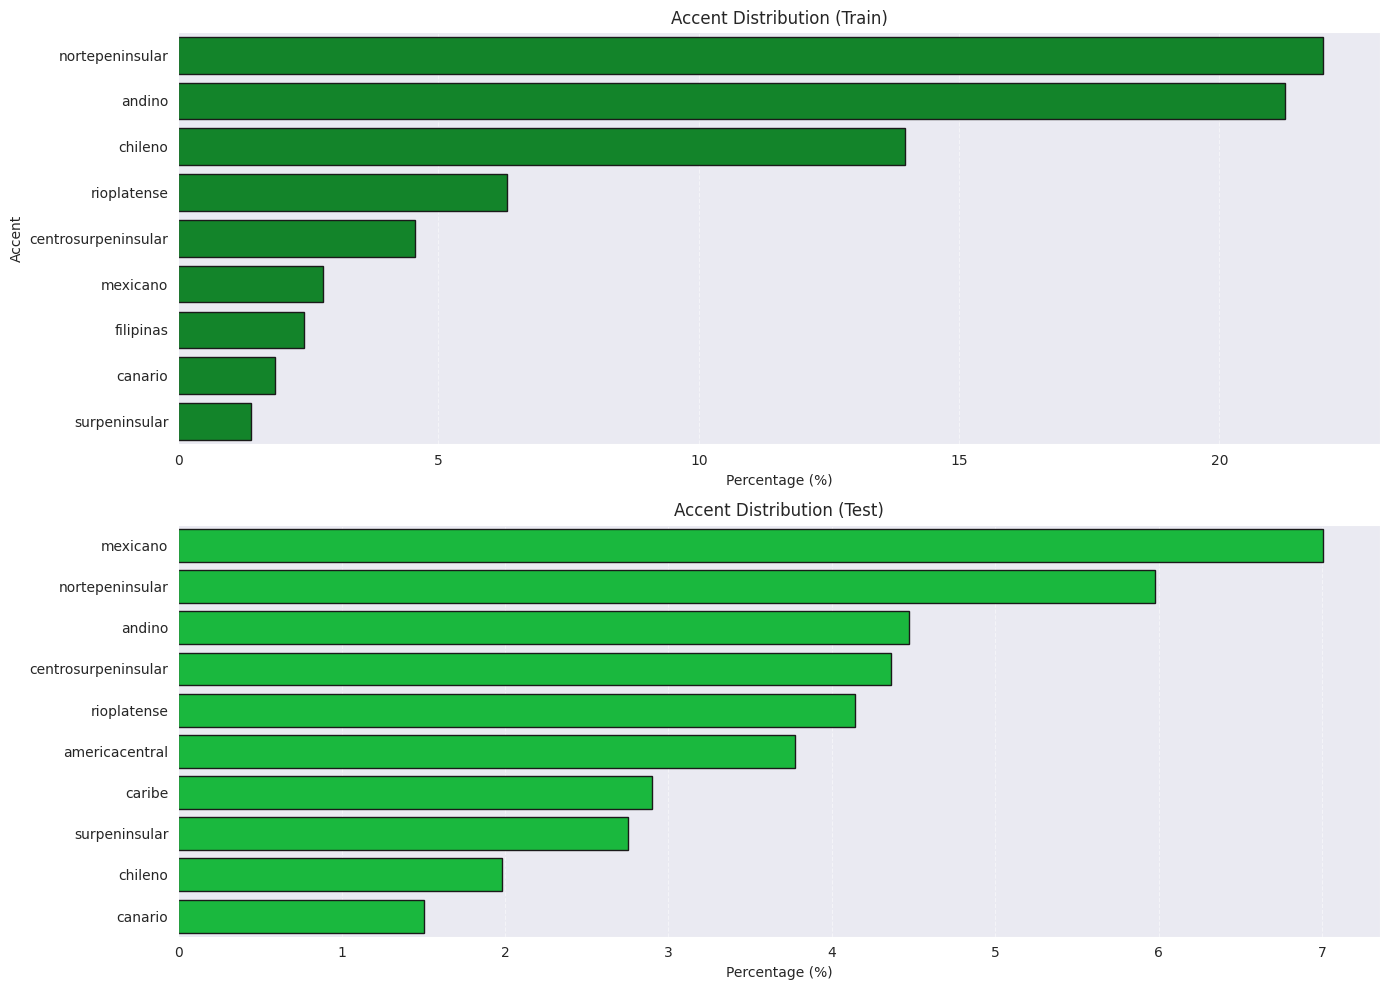

In [40]:
# Calcular porcentajes y ordenar en orden descendente
accent_counts_train = train['accent'].value_counts(normalize=True).reset_index()
accent_counts_train.columns = ['accent', 'percentage']
accent_counts_train['percentage'] *= 100  # Convertir a porcentaje
accent_counts_train = accent_counts_train.sort_values(by='percentage', ascending=False)

accent_counts_test = test['accent'].value_counts(normalize=True).reset_index()
accent_counts_test.columns = ['accent', 'percentage']
accent_counts_test['percentage'] *= 100  # Convertir a porcentaje
accent_counts_test = accent_counts_test.sort_values(by='percentage', ascending=False)

# Crear subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 10))

# Gráfico para Train (Darker Green)
sns.barplot(
    y='accent',
    x='percentage',
    data=accent_counts_train,
    color='#00971F',  # Darker Green for Train
    edgecolor='#1A1A1A',
    ax=ax1
)
ax1.set_title('Accent Distribution (Train)')
ax1.set_xlabel('Percentage (%)')
ax1.set_ylabel('Accent')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Gráfico para Test (Lighter Green)
sns.barplot(
    y='accent',
    x='percentage',
    data=accent_counts_test,
    color='#00D230',  # Lighter Green for Test
    edgecolor='#1A1A1A',
    ax=ax2
)
ax2.set_title('Accent Distribution (Test)')
ax2.set_xlabel('Percentage (%)')
ax2.set_ylabel('')  # Remove duplicate ylabel
ax2.grid(axis='x', linestyle='--', alpha=0.5)

# Ajustar diseño
plt.tight_layout()
plt.show()